In [14]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [15]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
#change to goalkeepers features later
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('defenders_rating_X.csv')
y = pd.read_csv('defenders_rating_y.csv')

In [16]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0              0.0           0.0   
1    0.0      1.0             0.0              0.0           0.0   
2    1.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    0.0      0.0             1.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  ...  \
0            0.0           0.0            0.00        0.0      0.0  ...   
1            0.0           0.2            0.25        0.0      0.0  ...   
2            0.0           0.0            0.00        0.0      0.0  ...   
3            0.0           0.0            0.00        0.0      0.0  ...   
4            0.0           0.0            0.00        0.0      0.0  ...   

   flow_success  betweenness2goals  minutesPlayed  game_duration  year  \
0      0.279569           0.646684       0.369738       0.000000  

In [17]:
X.columns

Index(['goals', 'assists', 'shots_ontarget', 'shots_offtarget', 'shotsblocked',
       'chances2score', 'drib_success', 'drib_unsuccess', 'keypasses',
       'touches', 'passes_acc', 'passes_inacc', 'crosses_acc', 'crosses_inacc',
       'lballs_acc', 'lballs_inacc', 'grduels_w', 'grduels_l', 'aerials_w',
       'aerials_l', 'poss_lost', 'fouls', 'wasfouled', 'clearances',
       'stop_shots', 'interceptions', 'tackles', 'dribbled_past', 'tballs_acc',
       'tballs_inacc', 'ycards', 'rcards', 'dangmistakes', 'countattack',
       'offsides', 'missed_penalties', 'owngoals', 'degree_centrality',
       'betweenness_centrality', 'closeness_centrality', 'flow_centrality',
       'flow_success', 'betweenness2goals', 'minutesPlayed', 'game_duration',
       'year', 'month', 'day', 'pos_role_DC', 'pos_role_DL', 'pos_role_DR'],
      dtype='object')

In [18]:
X.head()

goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0              0.0           0.0   
1    0.0      1.0             0.0              0.0           0.0   
2    1.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    0.0      0.0             1.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  ...  \
0            0.0           0.0            0.00        0.0      0.0  ...   
1            0.0           0.2            0.25        0.0      0.0  ...   
2            0.0           0.0            0.00        0.0      0.0  ...   
3            0.0           0.0            0.00        0.0      0.0  ...   
4            0.0           0.0            0.00        0.0      0.0  ...   

   flow_success  betweenness2goals  minutesPlayed  game_duration  year  \
0      0.279569           0.646684       0.369738       0.000000   0.0   
1      0.628649           0.808355       0.591744       0.000000   0.0   
2      0.242435           0.615889       0.383423       0.641026   0.0   
3      0.391603           0.680720       0.332737       0.133333   0.0   
4      0.340058           0.646684       0.314236       0.121644   0.0   

      month  day  pos_role_DC  pos_role_DL  pos_role_DR  
0  0.727273  0.0          0.0     0.454545          0.3  
1  0.727273  0.0          0.0     0.454545          0.3  
2  0.727273  0.0          0.0     0.454545          0.3  
3  0.727273  0.0          0.0     0.454545          0.3  
4  0.727273  0.0          0.0     0.454545          0.3  

[5 rows x 51 columns]

In [19]:
y.head()

original_rating
0             6.56
1             6.38
2             6.80
3             6.81
4             6.59

In [20]:
#removing columns;
import pandas as pd

# Assuming X is your DataFrame
# List of columns to drop
columns_to_drop =['betweenness2goals', 'crosses_inacc', 'minutesPlayed'] 

# Drop the specified columns in place
X.drop(columns=columns_to_drop, inplace=True)

# Optionally, check the resulting DataFrame
print(X.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0              0.0           0.0   
1    0.0      1.0             0.0              0.0           0.0   
2    1.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    0.0      0.0             1.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  ...  \
0            0.0           0.0            0.00        0.0      0.0  ...   
1            0.0           0.2            0.25        0.0      0.0  ...   
2            0.0           0.0            0.00        0.0      0.0  ...   
3            0.0           0.0            0.00        0.0      0.0  ...   
4            0.0           0.0            0.00        0.0      0.0  ...   

   closeness_centrality  flow_centrality  flow_success  game_duration  year  \
0                   0.0         0.561170      0.279569       

## Modelling

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 3538
Validation set size: 1180
Test set size: 1180


In [23]:
X_train.head()

goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
947     1.0      0.0             0.0              0.0           0.0   
249     1.0      0.0             0.0              0.0           0.0   
5514    0.0      1.0             0.0              0.0           0.0   
3232    1.0      0.0             0.0              0.0           0.0   
824     1.0      0.0             0.0              0.0           0.0   

      chances2score  drib_success  drib_unsuccess  keypasses  touches  ...  \
947             0.0           0.2             0.0       0.25      0.0  ...   
249             0.0           0.0             0.0       0.00      0.0  ...   
5514            0.0           0.0             0.0       0.00      0.0  ...   
3232            0.0           0.0             0.0       0.00      0.0  ...   
824             0.0           0.2             0.0       0.25      0.0  ...   

      closeness_centrality  flow_centrality  flow_success  game_duration  \
947                    0.0         0.840426      0.561709       0.296296   
249                    0.0         0.840426      0.381893       0.273224   
5514                   0.0         0.640957      0.491270       0.076154   
3232                   0.0         0.521277      0.259519       0.229885   
824                    0.0         0.601064      0.344510       0.085470   

      year     month  day  pos_role_DC  pos_role_DL  pos_role_DR  
947    0.0  0.727273  0.0          0.5     0.727273     0.500000  
249    0.0  0.727273  0.0          0.0     0.454545     0.700000  
5514   0.0  0.727273  0.0          1.0     0.454545     0.566667  
3232   0.0  0.727273  0.0          1.0     0.000000     0.433333  
824    0.0  0.727273  0.0          0.5     0.727273     0.266667  

[5 rows x 48 columns]

In [24]:
X_val.shape

(1180, 48)

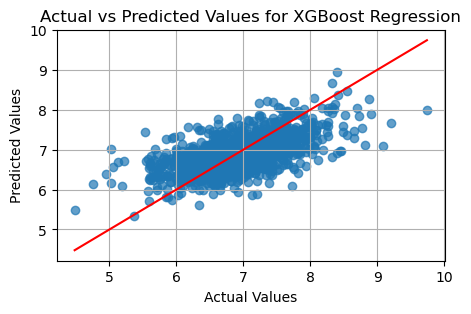

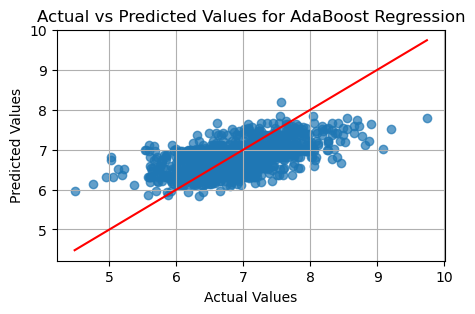

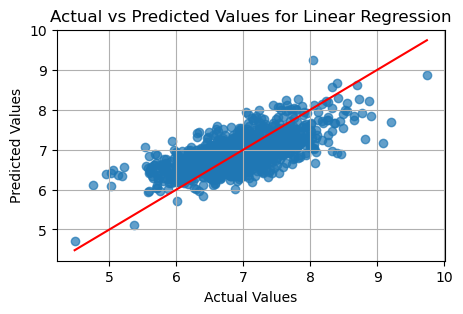

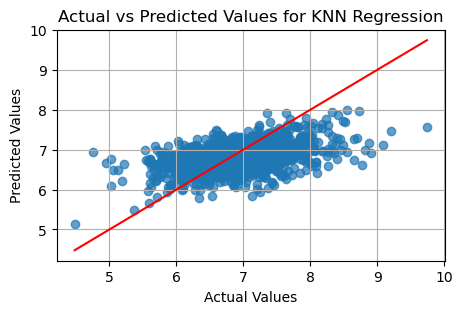

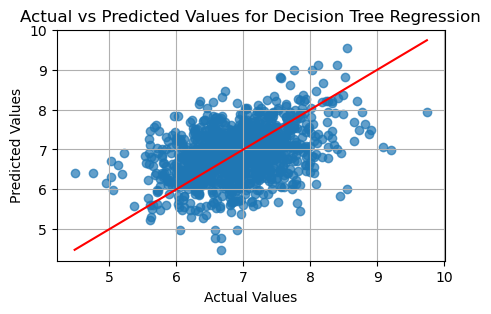

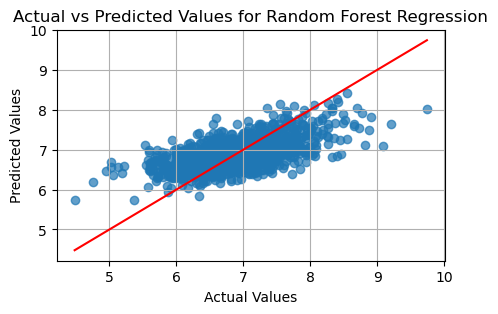

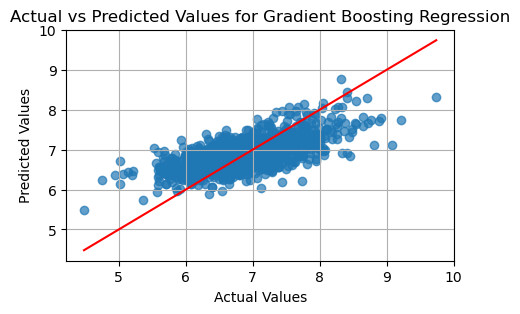

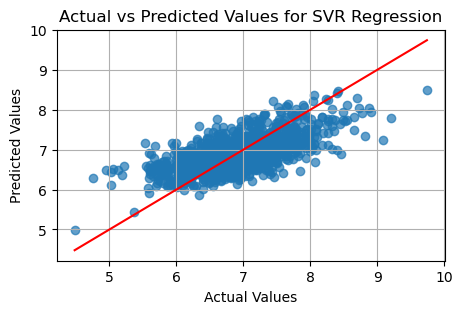

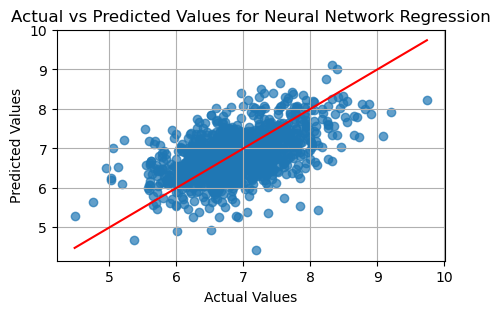

                          Model      MSE     RMSE        R2      MAE        R
0            XGBoost Regression  0.27413  0.52357   0.33882  0.41262  0.59123
1           AdaBoost Regression  0.28851  0.53713   0.30413  0.42284  0.56301
2             Linear Regression  0.22429  0.47360   0.45901  0.37973  0.67752
3                KNN Regression  0.33298  0.57704   0.19688  0.44770  0.46904
4      Decision Tree Regression  0.51071  0.71464  -0.23180  0.55974  0.38146
5      Random Forest Regression  0.26026  0.51015   0.37228  0.40275  0.61171
6  Gradient Boosting Regression  0.23618  0.48598   0.43036  0.38404  0.66053
7                SVR Regression  0.23177  0.48142   0.44100  0.38297  0.66420
8     Neural Network Regression  0.37040  0.60861   0.10661  0.47773  0.51817


In [25]:
# Features after removing correlated features, using base model, evaluation on val
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from scipy.stats import pearsonr

# Ensure y_train and y_val are numpy arrays
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()


# Define models
random_state = 42
models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression'),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression'),
    (LinearRegression(), 'Linear Regression'),
    (KNeighborsRegressor(), 'KNN Regression'),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression'),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression'),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression'),
    (SVR(), 'SVR Regression'),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression')
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R2', 'MAE','R'])

# Train, predict and evaluate models
metrics_list = []

for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r, _ = pearsonr(y_val, y_pred)
    
    metrics_list.append({
        'Model': name, 
        'MSE': f'{mse:.5f}', 
        'RMSE': f'{rmse:.5f}', 
        'R2': f'{r2:.5f}', 
        'MAE': f'{mae:.5f}',
        'R': f'{r:.5f}'
    })
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()
    

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

Training XGBoost Regression...
Best parameters for XGBoost Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


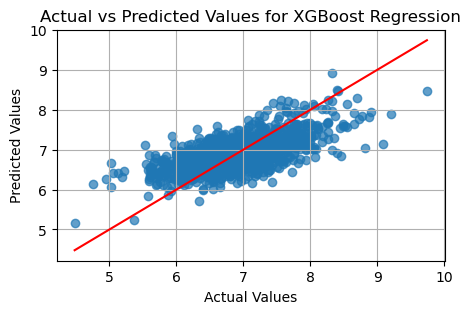

Training AdaBoost Regression...
Best parameters for AdaBoost Regression: {'learning_rate': 0.2, 'n_estimators': 200}


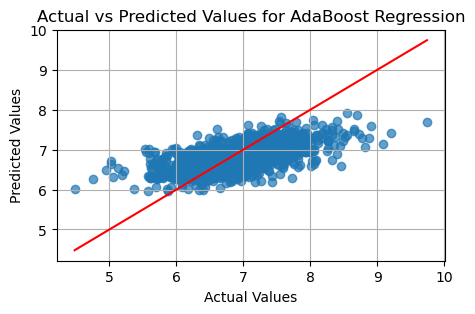

Training KNN Regression...
Best parameters for KNN Regression: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


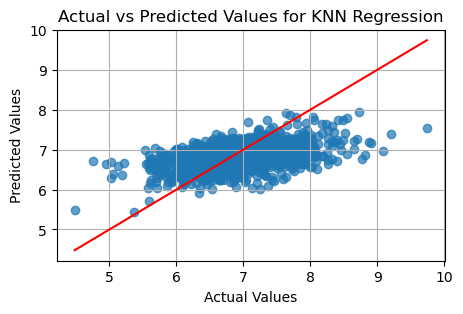

Training Decision Tree Regression...
Best parameters for Decision Tree Regression: {'max_depth': 10, 'min_samples_split': 20}


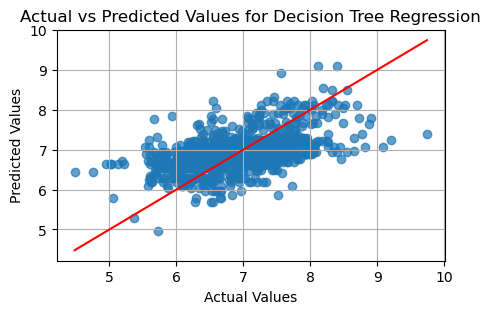

Training Random Forest Regression...
Best parameters for Random Forest Regression: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


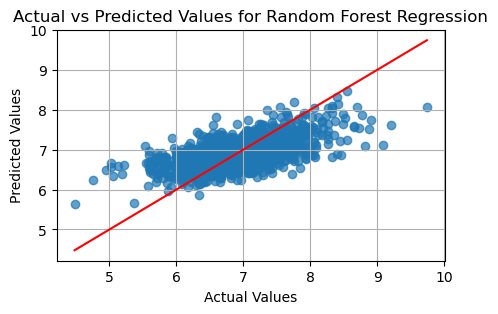

Training Gradient Boosting Regression...
Best parameters for Gradient Boosting Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


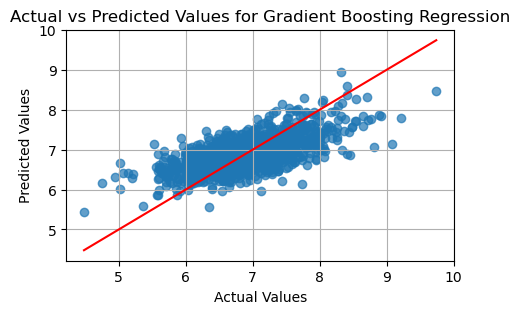

Training SVR Regression...
Best parameters for SVR Regression: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


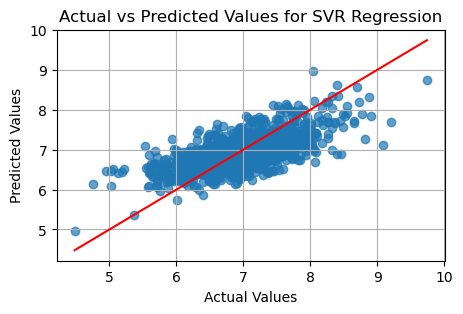

Training Neural Network Regression...
Best parameters for Neural Network Regression: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}


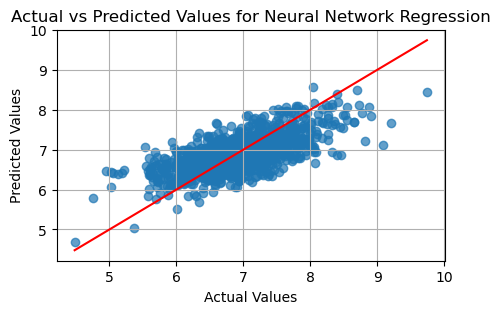

                          Model       MSE       MAE        R2      RMSE
0            XGBoost Regression  0.230753  0.381492  0.443437  0.480368
1           AdaBoost Regression  0.284891  0.420906  0.312860  0.533752
2                KNN Regression  0.323745  0.445868  0.219147  0.568986
3      Decision Tree Regression  0.319000  0.441393  0.230592  0.564800
4      Random Forest Regression  0.257791  0.400174  0.378224  0.507731
5  Gradient Boosting Regression  0.231744  0.379578  0.441048  0.481397
6                SVR Regression  0.223231  0.376727  0.461579  0.472474
7     Neural Network Regression  0.225485  0.378749  0.456144  0.474852


In [26]:
# Tuning the val data better with parameters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models and parameters for GridSearchCV
random_state = 42

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    })
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])

# Train, predict and evaluate models
metrics_list = []

for model, name, params in models:
    print(f"Training {name}...")
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    grid_search = GridSearchCV(model, param_grid=params, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")
    
    y_pred = best_model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mse)
    
    metrics_list.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse})
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

                          Model      RMSE       MSE       MAE        R2  \
0            XGBoost Regression  0.486638  0.236816  0.382750  0.436815   
1           AdaBoost Regression  0.531964  0.282985  0.420961  0.327017   
2                KNN Regression  0.572612  0.327885  0.452563  0.220240   
3      Decision Tree Regression  0.569880  0.324763  0.450742  0.227663   
4      Random Forest Regression  0.501776  0.251779  0.396632  0.401231   
5  Gradient Boosting Regression  0.488453  0.238587  0.382290  0.432605   
6                SVR Regression  0.477234  0.227752  0.375088  0.458370   
7     Neural Network Regression  0.482152  0.232471  0.380272  0.447149   

          R  
0  0.662855  
1  0.576762  
2  0.480610  
3  0.517442  
4  0.635592  
5  0.658829  
6  0.678476  
7  0.677751  


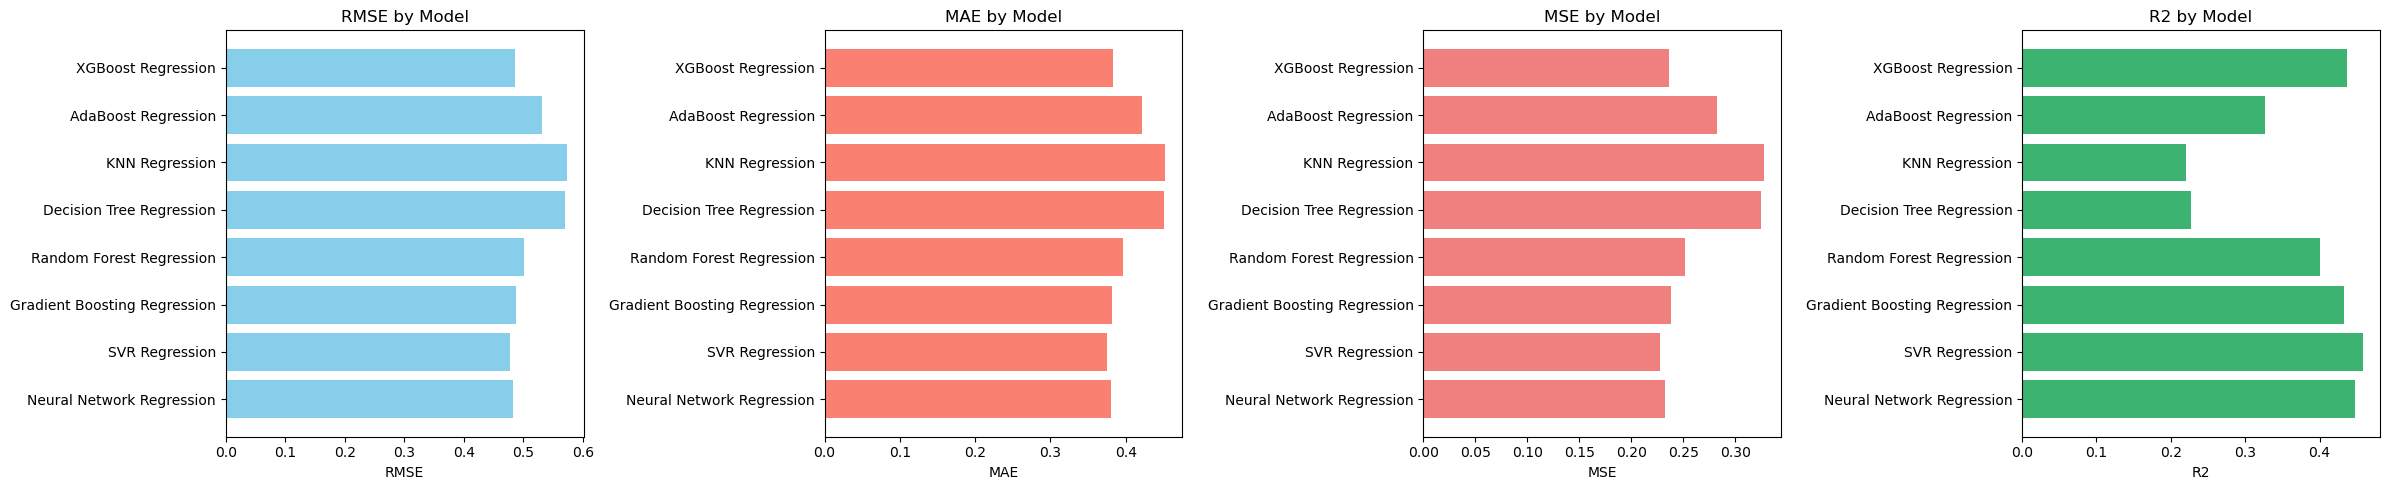

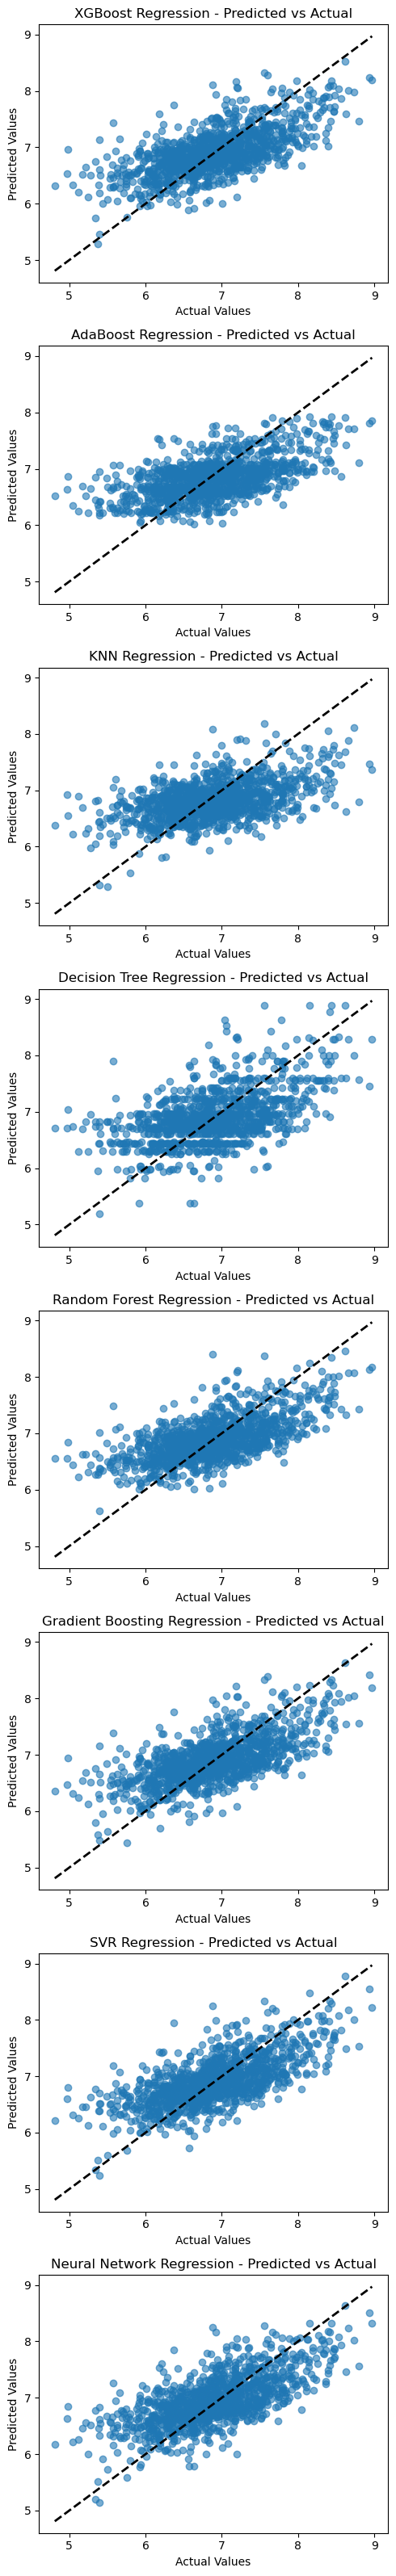

In [28]:

#using the best parameters on  features after correlation added on the test set
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])


# Define models with the best parameters found

            
best_params = {
    'XGBoost Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.2},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto'},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2},
    'Gradient Boosting Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'rbf', 'gamma': 'auto'},
    'Neural Network Regression': {'hidden_layer_sizes': (50,50,), 'activation': 'tanh', 'solver': 'adam'},
}
models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
        
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return predictions, rmse, mae, mse, r2,r

# Evaluate each model
test_results = []
predictions_dict = {}

for name, model in models.items():
    predictions, rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val, y_train_val, X_test, y_test)
    test_results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'R':r
    })
    predictions_dict[name] = predictions

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'RMSE', 'MSE', 'MAE', 'R2','R']])

# Visualization of the performance metrics
def plot_metrics(df):
    fig, axes = plt.subplots(1, 4, figsize=(24, 5))

    # RMSE
    axes[0].barh(df['Model'], df['RMSE'], color='skyblue')
    axes[0].set_title('RMSE by Model')
    axes[0].set_xlabel('RMSE')
    axes[0].invert_yaxis()

    # MAE
    axes[1].barh(df['Model'], df['MAE'], color='salmon')
    axes[1].set_title('MAE by Model')
    axes[1].set_xlabel('MAE')
    axes[1].invert_yaxis()

    # MSE
    axes[2].barh(df['Model'], df['MSE'], color='lightcoral')
    axes[2].set_title('MSE by Model')
    axes[2].set_xlabel('MSE')
    axes[2].invert_yaxis()

    # R2
    axes[3].barh(df['Model'], df['R2'], color='mediumseagreen')
    axes[3].set_title('R2 by Model')
    axes[3].set_xlabel('R2')
    axes[3].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(test_results_df)

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(5, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

In [29]:
# Display the DataFrames
X_train_val.head()

goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
4669    1.0      0.0             0.0              0.0           0.0   
5603    1.0      0.0             0.0              0.0           0.0   
856     1.0      0.0             0.0              0.0           0.0   
1335    0.0      1.0             0.0              0.0           0.0   
2259    1.0      0.0             0.0              0.0           0.0   

      chances2score  drib_success  drib_unsuccess  keypasses   touches  ...  \
4669       0.000000           0.0            0.00       0.00  0.000000  ...   
5603       0.000000           0.2            0.00       0.25  0.000000  ...   
856        0.666667           0.4            0.25       0.75  0.285714  ...   
1335       0.000000           0.0            0.00       0.00  0.000000  ...   
2259       0.000000           0.0            0.00       0.00  0.000000  ...   

      closeness_centrality  flow_centrality  flow_success  game_duration  \
4669                   0.0         0.632979      0.593147       0.000000   
5603                   0.0         0.760638      0.388122       0.370370   
856                    0.0         0.864975      0.511361       0.333333   
1335                   0.0         0.521277      0.235396       0.130550   
2259                   0.0         0.558511      0.246303       0.322581   

      year     month  day  pos_role_DC  pos_role_DL  pos_role_DR  
4669   0.0  0.727273  0.0          1.0     0.272727     0.433333  
5603   0.0  0.727273  0.0          1.0     0.454545     0.700000  
856    0.0  0.727273  0.0          0.5     0.727273     0.300000  
1335   0.0  0.727273  0.0          0.5     0.818182     0.000000  
2259   0.0  0.727273  0.0          0.5     1.000000     0.033333  

[5 rows x 48 columns]

In [30]:
y_train_val.head()

original_rating
4669             6.48
5603             6.94
856              7.39
1335             6.11
2259             7.48

                   Feature  Importance
20                   fouls    0.229447
3          shots_offtarget    0.107222
12             crosses_acc    0.087622
42                    year    0.082147
25                 tackles    0.080202
4             shotsblocked    0.051316
18               aerials_l    0.047378
41           game_duration    0.045578
28            tballs_inacc    0.029323
34        missed_penalties    0.022320
32             countattack    0.020217
27              tballs_acc    0.018738
33                offsides    0.018138
26           dribbled_past    0.017536
9                  touches    0.017409
23              stop_shots    0.016100
35                owngoals    0.015902
40            flow_success    0.014717
38    closeness_centrality    0.014519
11            passes_inacc    0.011115
22              clearances    0.009288
5            chances2score    0.004857
39         flow_centrality    0.004621
47             pos_role_DR    0.003908
14            lballs_inac

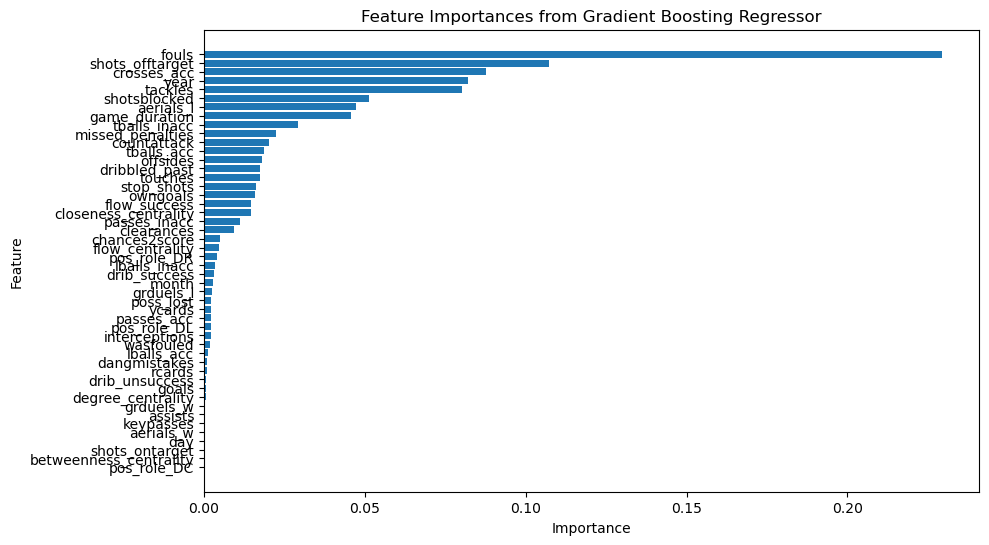

In [31]:
#using gradient boosting to find feature importance in the models 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Sample Data (Replace with your actual data)
# X_train_val_df = pd.DataFrame({...})
# y_train_val_df = pd.Series([...])

# Parameters from the tuning
random_state = 42


# Train GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=random_state)
gb_regressor.fit(X_train, y_train)

# Extract feature importances
importances = gb_regressor.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

In [34]:
X_train.shape

(3538, 48)

In [32]:
import pandas as pd
import numpy as np
import random
import time
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

In [33]:
# Assuming X_train, y_train, X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train = pd.DataFrame({...})
# y_train = pd.Series([...])
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])

# Calculate feature importances using RandomForestRegressor on training and validation data
gb_regressor = GradientBoostingRegressor(random_state=random_state)
gb_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(gb_regressor.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Define subsets of features
feature_subsets = {
    'top_5': feature_importances.index[:5],
    'top_10': feature_importances.index[:10],
    'top_15': feature_importances.index[:15],
    'top_20': feature_importances.index[:20],
    'top_30': feature_importances.index[:30],
}

In [34]:
# Define models with parameter grids for hyperparameter tuning
models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    }),
    (LinearRegression(), 'Linear Regression', {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'n_jobs': [-1,2,3]
    })
]

In [35]:
# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, predictions)
        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None


In [36]:
results = []
subset_name = 'top_5'
features = feature_subsets[subset_name]
X_train_subset = X_train[features]
X_val_subset = X_val[features]

for model, name, params in models:
    mse, mae, rmse, r2, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
    if best_model is not None:
        results.append({
            'Subset': subset_name,
            'Model': name,
            'MSE': f'{mse:.5f}',
            'MAE': f'{mae:.5f}',
            'RMSE': f'{rmse:.5f}',
            'R2 Score': f'{r2:.5f}',
            'Best Params': best_params,
            'Training Time (s)': f'{training_time:.5f}'
        })

# Convert results to DataFrame
results_df_top_5 = pd.DataFrame(results)
print(results_df_top_5[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2 Score', 'Best Params', 'Training Time (s)']])

  Subset                         Model      MSE      MAE     RMSE R2 Score  \
0  top_5            XGBoost Regression  0.29569  0.43023  0.54377  0.28682   
1  top_5           AdaBoost Regression  0.31707  0.44396  0.56309  0.23524   
2  top_5                KNN Regression  0.33381  0.45446  0.57777  0.19486   
3  top_5      Decision Tree Regression  0.32920  0.44736  0.57376  0.20600   
4  top_5      Random Forest Regression  0.30088  0.43119  0.54852  0.27431   
5  top_5  Gradient Boosting Regression  0.29516  0.42980  0.54328  0.28810   
6  top_5                SVR Regression  0.28793  0.42349  0.53659  0.30553   
7  top_5     Neural Network Regression  0.29070  0.42600  0.53917  0.29884   
8  top_5             Linear Regression  0.29125  0.42611  0.53968  0.29752   

                                         Best Params Training Time (s)  
0  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...          21.46496  
1        {'learning_rate': 0.1, 'n_estimators': 200}          15.39606  


In [37]:
results = []
subset_name = 'top_10'
features = feature_subsets[subset_name]
X_train_subset = X_train[features]
X_val_subset = X_val[features]

for model, name, params in models:
    mse, mae, rmse, r2, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
    if best_model is not None:
        results.append({
            'Subset': subset_name,
            'Model': name,
            'MSE': f'{mse:.5f}',
            'MAE': f'{mae:.5f}',
            'RMSE': f'{rmse:.5f}',
            'R2 Score': f'{r2:.5f}',
            'Best Params': best_params,
            'Training Time (s)': f'{training_time:.5f}'
        })

# Convert results to DataFrame
results_df_top_10 = pd.DataFrame(results)
print(results_df_top_10[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2 Score', 'Best Params', 'Training Time (s)']])

   Subset                         Model      MSE      MAE     RMSE R2 Score  \
0  top_10            XGBoost Regression  0.26497  0.40664  0.51475  0.36090   
1  top_10           AdaBoost Regression  0.29919  0.43070  0.54698  0.27838   
2  top_10                KNN Regression  0.29371  0.42666  0.54195  0.29160   
3  top_10      Decision Tree Regression  0.33108  0.44925  0.57540  0.20145   
4  top_10      Random Forest Regression  0.27377  0.41126  0.52323  0.33967   
5  top_10  Gradient Boosting Regression  0.26582  0.40667  0.51558  0.35885   
6  top_10                SVR Regression  0.25698  0.40019  0.50694  0.38017   
7  top_10     Neural Network Regression  0.25980  0.40404  0.50971  0.37338   
8  top_10             Linear Regression  0.25754  0.40222  0.50748  0.37883   

                                         Best Params Training Time (s)  
0  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...          24.93400  
1        {'learning_rate': 0.2, 'n_estimators': 200}          2

In [38]:
results = []
subset_name = 'top_15'
features = feature_subsets[subset_name]
X_train_subset = X_train[features]
X_val_subset = X_val[features]

for model, name, params in models:
    mse, mae, rmse, r2, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
    if best_model is not None:
        results.append({
            'Subset': subset_name,
            'Model': name,
            'MSE': f'{mse:.5f}',
            'MAE': f'{mae:.5f}',
            'RMSE': f'{rmse:.5f}',
            'R2 Score': f'{r2:.5f}',
            'Best Params': best_params,
            'Training Time (s)': f'{training_time:.5f}'
        })

# Convert results to DataFrame
results_df_top_15 = pd.DataFrame(results)
print(results_df_top_15[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2 Score', 'Best Params', 'Training Time (s)']])

   Subset                         Model      MSE      MAE     RMSE R2 Score  \
0  top_15            XGBoost Regression  0.24365  0.39189  0.49361  0.41232   
1  top_15           AdaBoost Regression  0.28895  0.42277  0.53754  0.30306   
2  top_15                KNN Regression  0.27884  0.41297  0.52805  0.32746   
3  top_15      Decision Tree Regression  0.31518  0.44221  0.56141  0.23980   
4  top_15      Random Forest Regression  0.26180  0.40251  0.51166  0.36856   
5  top_15  Gradient Boosting Regression  0.24488  0.39131  0.49486  0.40936   
6  top_15                SVR Regression  0.23422  0.38535  0.48396  0.43507   
7  top_15     Neural Network Regression  0.23741  0.38846  0.48725  0.42738   
8  top_15             Linear Regression  0.23588  0.38798  0.48567  0.43108   

                                         Best Params Training Time (s)  
0  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...          11.19678  
1        {'learning_rate': 0.2, 'n_estimators': 200}          1

In [39]:
results = []
subset_name = 'top_20'
features = feature_subsets[subset_name]
X_train_subset = X_train[features]
X_val_subset = X_val[features]

for model, name, params in models:
    mse, mae, rmse, r2, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
    if best_model is not None:
        results.append({
            'Subset': subset_name,
            'Model': name,
            'MSE': f'{mse:.5f}',
            'MAE': f'{mae:.5f}',
            'RMSE': f'{rmse:.5f}',
            'R2 Score': f'{r2:.5f}',
            'Best Params': best_params,
            'Training Time (s)': f'{training_time:.5f}'
        })

# Convert results to DataFrame
results_df_top_20 = pd.DataFrame(results)
print(results_df_top_20[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2 Score', 'Best Params', 'Training Time (s)']])

   Subset                         Model      MSE      MAE     RMSE R2 Score  \
0  top_20            XGBoost Regression  0.23389  0.38419  0.48362  0.43587   
1  top_20           AdaBoost Regression  0.28751  0.42274  0.53620  0.30655   
2  top_20                KNN Regression  0.28495  0.41899  0.53381  0.31272   
3  top_20      Decision Tree Regression  0.31131  0.43887  0.55795  0.24914   
4  top_20      Random Forest Regression  0.25664  0.39943  0.50660  0.38099   
5  top_20  Gradient Boosting Regression  0.23589  0.38386  0.48568  0.43105   
6  top_20                SVR Regression  0.22476  0.37860  0.47409  0.45789   
7  top_20     Neural Network Regression  0.22558  0.38016  0.47495  0.45591   
8  top_20             Linear Regression  0.22578  0.38071  0.47516  0.45543   

                                         Best Params Training Time (s)  
0  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...          14.12585  
1        {'learning_rate': 0.2, 'n_estimators': 200}          1

In [40]:
results = []
subset_name = 'top_30'
features = feature_subsets[subset_name]
X_train_subset = X_train[features]
X_val_subset = X_val[features]

for model, name, params in models:
    mse, mae, rmse, r2, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
    if best_model is not None:
        results.append({
            'Subset': subset_name,
            'Model': name,
            'MSE': f'{mse:.5f}',
            'MAE': f'{mae:.5f}',
            'RMSE': f'{rmse:.5f}',
            'R2 Score': f'{r2:.5f}',
            'Best Params': best_params,
            'Training Time (s)': f'{training_time:.5f}'
        })

# Convert results to DataFrame
results_df_top_30 = pd.DataFrame(results)
print(results_df_top_30[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2 Score', 'Best Params', 'Training Time (s)']])

   Subset                         Model      MSE      MAE     RMSE R2 Score  \
0  top_30            XGBoost Regression  0.23021  0.38066  0.47980  0.44475   
1  top_30           AdaBoost Regression  0.28689  0.42213  0.53562  0.30805   
2  top_30                KNN Regression  0.29207  0.42533  0.54044  0.29554   
3  top_30      Decision Tree Regression  0.32255  0.44350  0.56793  0.22204   
4  top_30      Random Forest Regression  0.25590  0.39974  0.50586  0.38279   
5  top_30  Gradient Boosting Regression  0.23260  0.38054  0.48229  0.43897   
6  top_30                SVR Regression  0.22286  0.37835  0.47208  0.46247   
7  top_30     Neural Network Regression  0.22483  0.37952  0.47416  0.45773   
8  top_30             Linear Regression  0.22489  0.37996  0.47423  0.45757   

                                         Best Params Training Time (s)  
0  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...          17.83189  
1        {'learning_rate': 0.2, 'n_estimators': 200}          2

In [42]:
pd.set_option('display.max_colwidth', None)
results_df_top_30

Subset                         Model      MSE      MAE     RMSE R2 Score  \
0  top_30            XGBoost Regression  0.23021  0.38066  0.47980  0.44475   
1  top_30           AdaBoost Regression  0.28689  0.42213  0.53562  0.30805   
2  top_30                KNN Regression  0.29207  0.42533  0.54044  0.29554   
3  top_30      Decision Tree Regression  0.32255  0.44350  0.56793  0.22204   
4  top_30      Random Forest Regression  0.25590  0.39974  0.50586  0.38279   
5  top_30  Gradient Boosting Regression  0.23260  0.38054  0.48229  0.43897   
6  top_30                SVR Regression  0.22286  0.37835  0.47208  0.46247   
7  top_30     Neural Network Regression  0.22483  0.37952  0.47416  0.45773   
8  top_30             Linear Regression  0.22489  0.37996  0.47423  0.45757   

                                                              Best Params  \
0             {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}   
1                             {'learning_rate': 0.2, 'n_estimators': 200}   
2     {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}   
3                              {'max_depth': 10, 'min_samples_split': 20}   
4         {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}   
5             {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}   
6                             {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}   
7  {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}   
8                   {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}   

  Training Time (s)  
0          17.83189  
1          21.03927  
2           3.51139  
3           1.10775  
4         230.39230  
5          76.26805  
6          26.90508  
7         329.98414  
8          75.87676

                          Model       MSE       MAE      RMSE        R2  \
0            XGBoost Regression  0.238608  0.384420  0.488475  0.432554   
1           AdaBoost Regression  0.289516  0.426091  0.538067  0.311488   
2                KNN Regression  0.276431  0.413601  0.525767  0.342605   
3      Decision Tree Regression  0.319562  0.446005  0.565298  0.240032   
4      Random Forest Regression  0.251898  0.395168  0.501895  0.400948   
5  Gradient Boosting Regression  0.238887  0.382678  0.488760  0.431891   
6                SVR Regression  0.228993  0.376617  0.478532  0.455421   
7     Neural Network Regression  0.230147  0.377958  0.479737  0.452674   

          R  
0  0.658960  
1  0.574710  
2  0.591392  
3  0.528945  
4  0.634883  
5  0.658136  
6  0.676275  
7  0.672980  


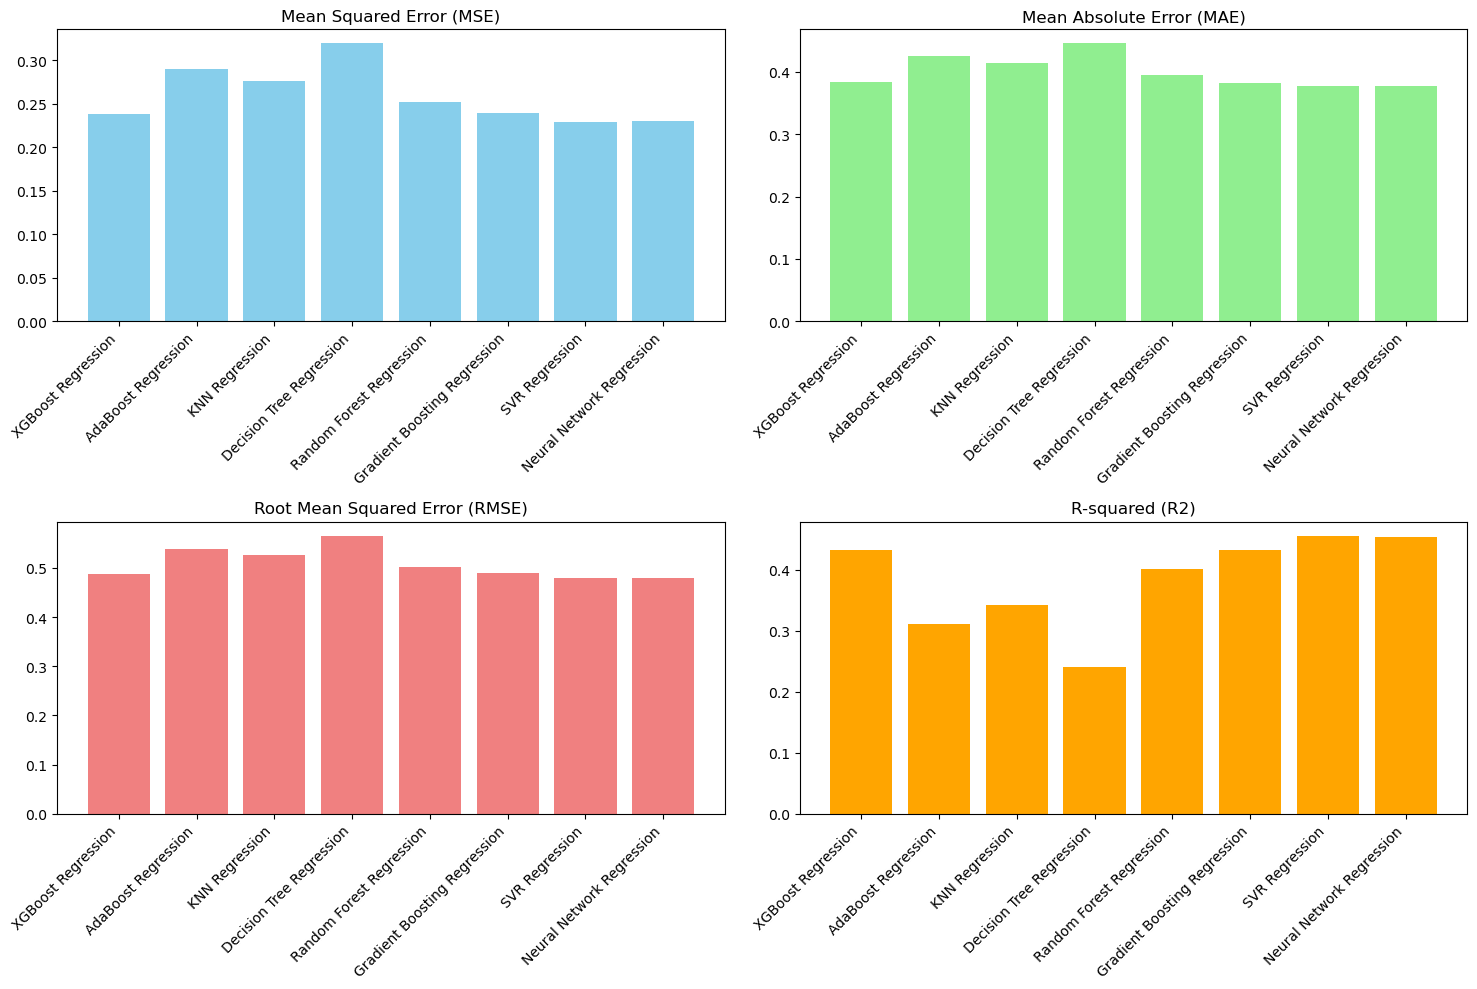

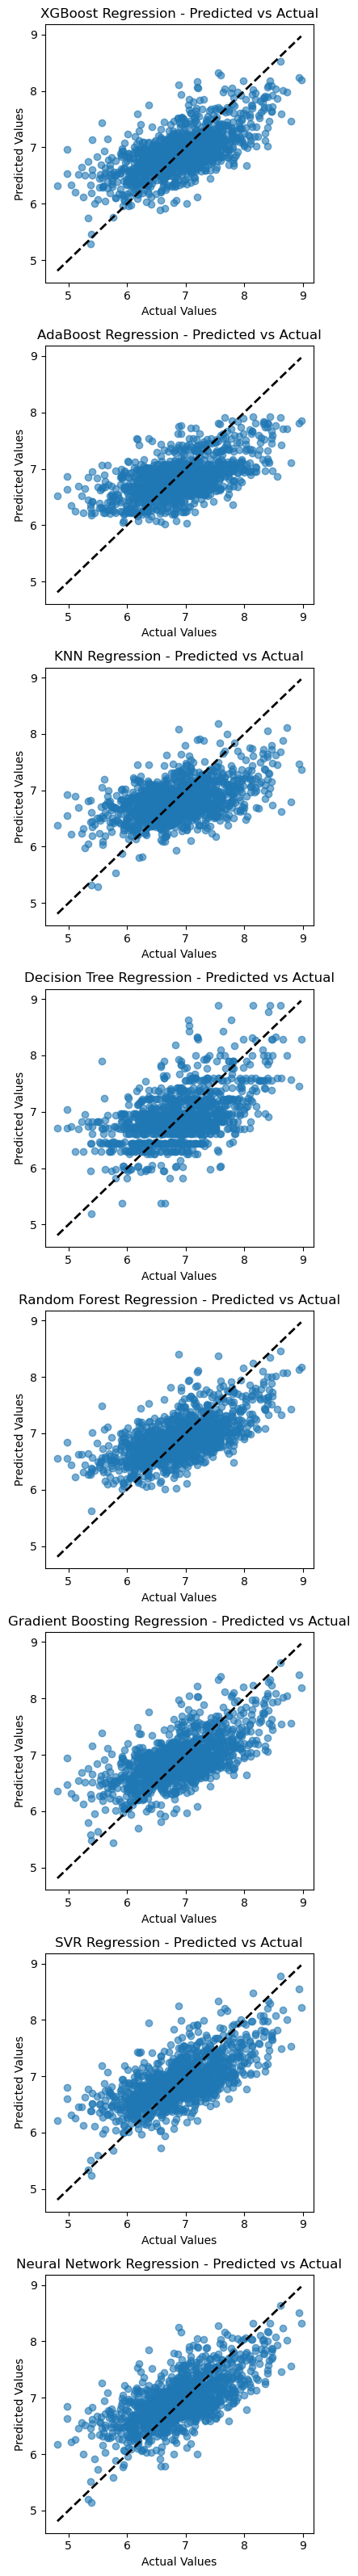

In [43]:
#using top 30 features with the X_train_val dataset and test sets, with the best parameters earlier
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr


# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:30]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features]

# Define models with the best parameters found
best_params = {
    'XGBoost Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 100, 'learning_rate': 0.2},
    'KNN Regression': {'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'ball_tree'},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 10},
    'Gradient Boosting Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'rbf', 'gamma': 'auto'},
    'Neural Network Regression': {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam'},
    'Linear Regression': {'copy_X':True, 'fit_intercept':True, 'n_jobs':-1}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

                           Model       MSE       MAE      RMSE        R2  \
0             XGBoost Regression  0.238608  0.384420  0.488475  0.432554   
1            AdaBoost Regression  0.289516  0.426091  0.538067  0.311488   
2                 KNN Regression  0.276431  0.413601  0.525767  0.342605   
3       Decision Tree Regression  0.319562  0.446005  0.565298  0.240032   
4       Random Forest Regression  0.251898  0.395168  0.501895  0.400948   
5   Gradient Boosting Regression  0.238887  0.382678  0.488760  0.431891   
6                 SVR Regression  0.228993  0.376617  0.478532  0.455421   
7      Neural Network Regression  0.230147  0.377958  0.479737  0.452674   
8               Voting Regressor  0.230848  0.377533  0.480467  0.451008   
9        Stacking Regressor (LR)  0.228423  0.375262  0.477936  0.456775   
10       Stacking Regressor (RF)  0.241991  0.388400  0.491926  0.424508   
11       Stacking Regressor (GB)  0.230538  0.378444  0.480144  0.451745   

           

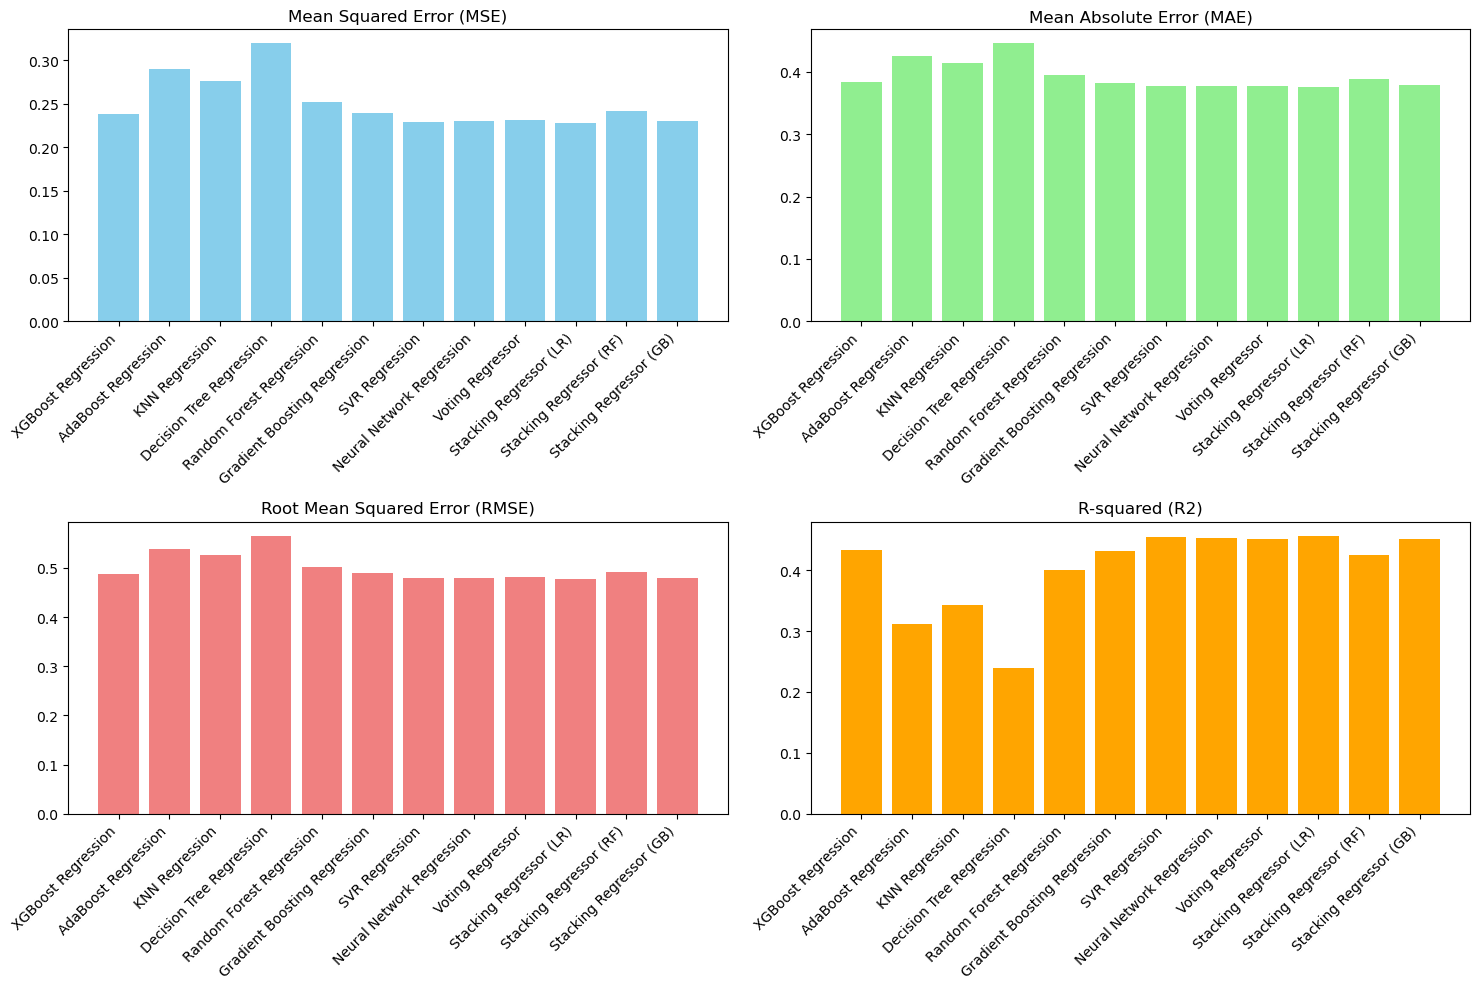

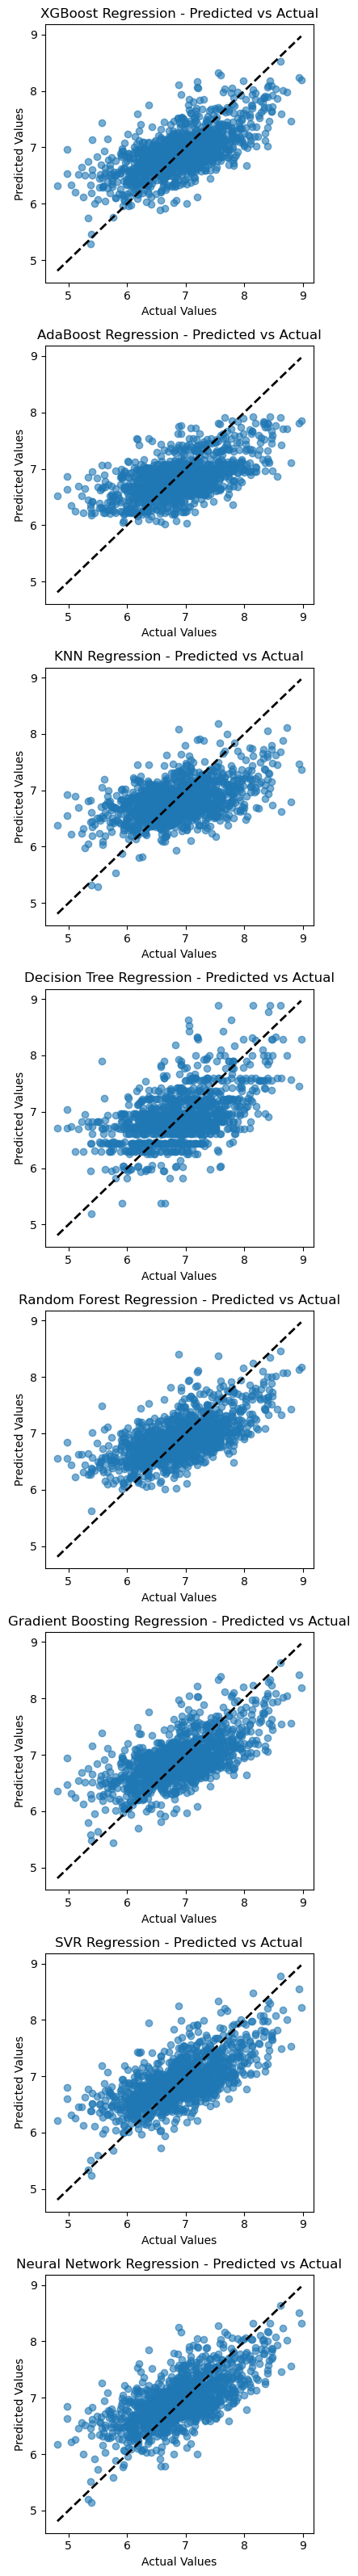

In [44]:
#uisng parameters with emsembles on test with top
#using top 30 features with the X_train_val dataset and test sets, with the best parameters earlier
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,VotingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr


# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:30]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features]

# Define models with the best parameters found
best_params = {
    'XGBoost Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 100, 'learning_rate': 0.2},
    'KNN Regression': {'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'ball_tree'},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 10},
    'Gradient Boosting Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'rbf', 'gamma': 'auto'},
    'Neural Network Regression': {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam'},
    'Linear Regression': {'copy_X':True, 'fit_intercept':True, 'n_jobs':-1}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}


# Adding ensembling methods
voting_regressor = VotingRegressor(estimators=[
    ('xgb', models['XGBoost Regression']),
    ('rf', models['Random Forest Regression']),
    ('gb', models['Gradient Boosting Regression']),
    ('svr', models['SVR Regression']),
    ('nn', models['Neural Network Regression'])
])

stacking_regressor_lr = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=LinearRegression()
)

stacking_regressor_rf = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=random_state)
)

stacking_regressor_gb = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=random_state)
)

models.update({
    'Voting Regressor': voting_regressor,
    'Stacking Regressor (LR)': stacking_regressor_lr,
    'Stacking Regressor (RF)': stacking_regressor_rf,
    'Stacking Regressor (GB)': stacking_regressor_gb
})

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

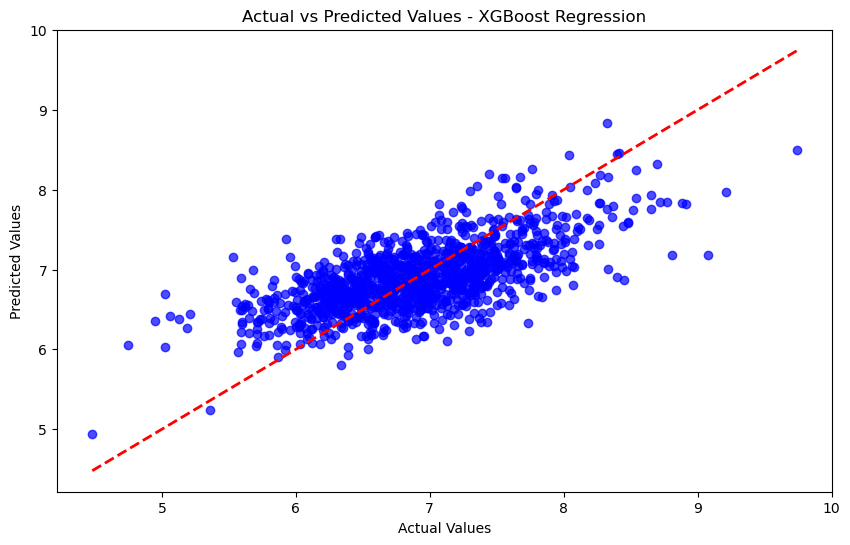

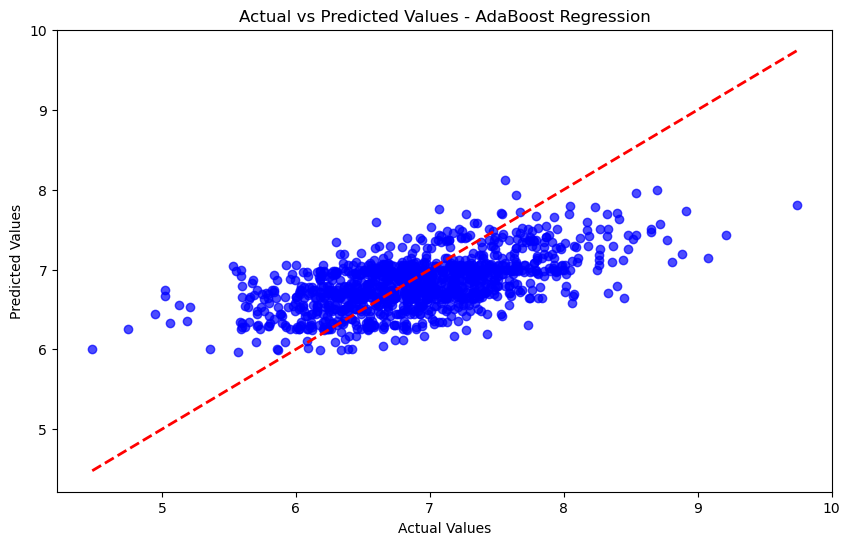

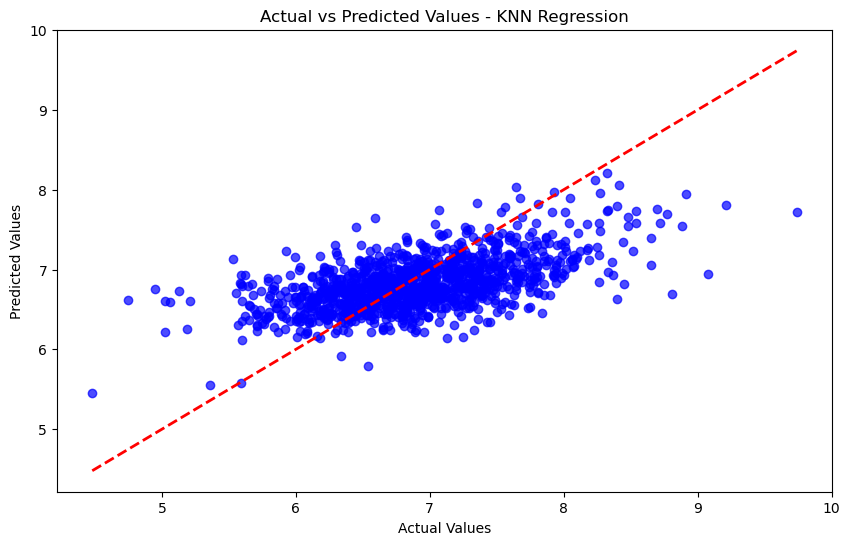

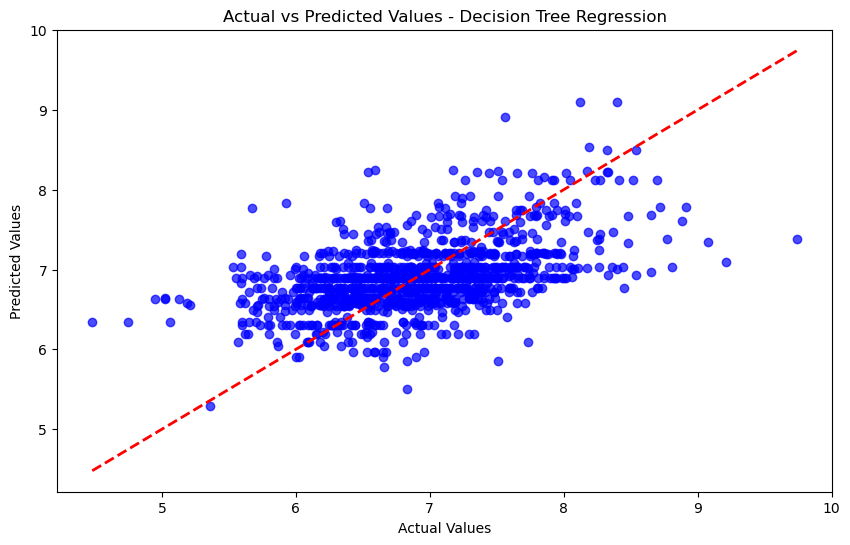

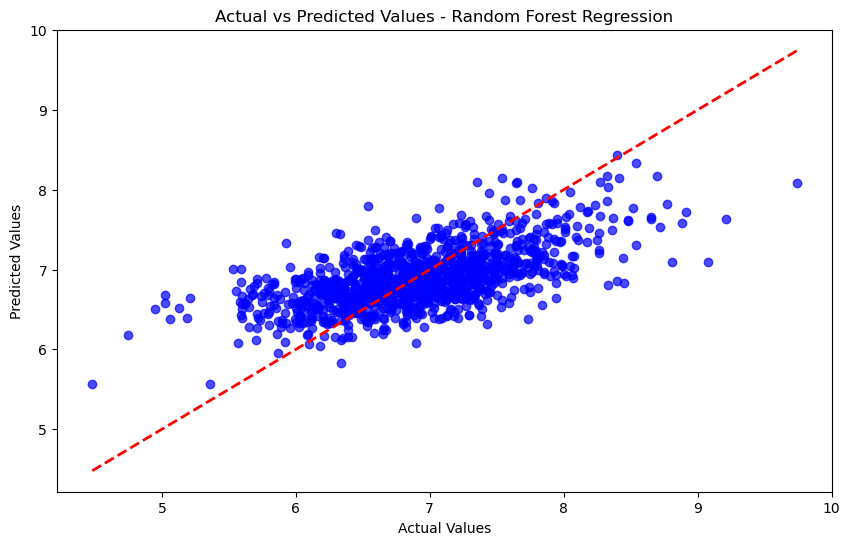

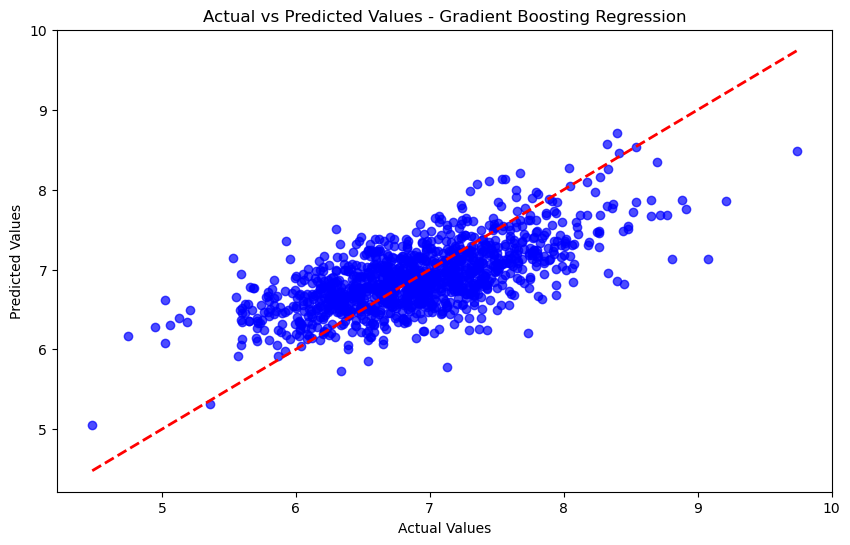

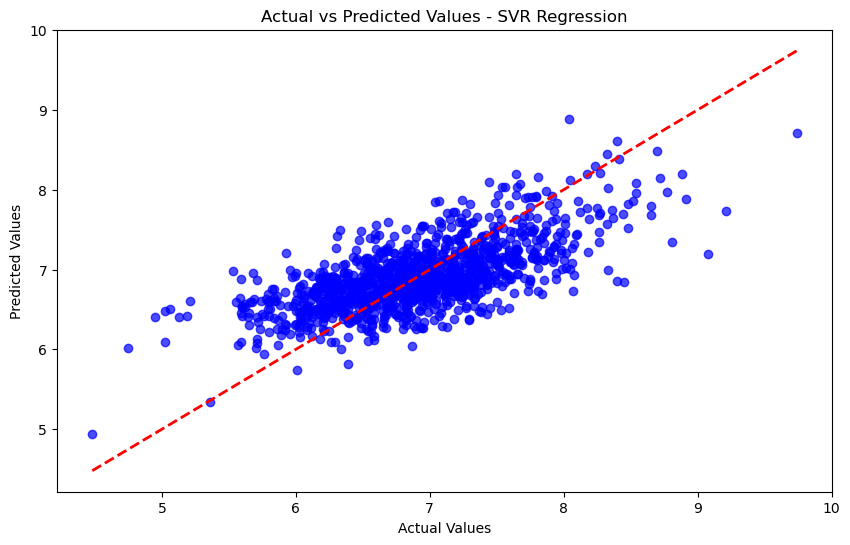

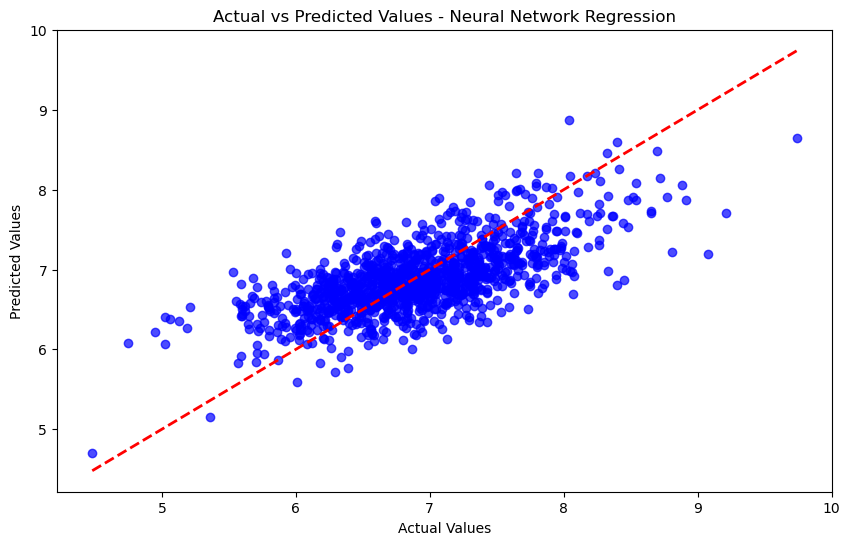

   Subset                         Model      MSE      MAE     RMSE       R2  \
0  top_30            XGBoost Regression  0.22981  0.38081  0.47938  0.44572   
1  top_30           AdaBoost Regression  0.28533  0.42399  0.53416  0.31180   
2  top_30                KNN Regression  0.28443  0.41787  0.53332  0.31398   
3  top_30      Decision Tree Regression  0.32493  0.44590  0.57003  0.21628   
4  top_30      Random Forest Regression  0.25590  0.39974  0.50586  0.38279   
5  top_30  Gradient Boosting Regression  0.23350  0.38309  0.48321  0.43682   
6  top_30                SVR Regression  0.22286  0.37835  0.47208  0.46247   
7  top_30     Neural Network Regression  0.22483  0.37952  0.47416  0.45773   

                                      Best Params Training Time (s)  
0     {'colsample_bytree': 0.7, 'subsample': 0.9}          14.28346  
1                              {'loss': 'square'}           5.90000  
2                               {'leaf_size': 10}           0.92325  
3       

In [46]:
#using more parameters to tune the top 30 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])


# Define subset of features (top 20 only)
# Select the subset of 20 features
selected_features = feature_importances.index[:30]
X_train_subset = X_train[selected_features]
X_val_subset = X_val[selected_features]

    
# Define models with parameter grids for hyperparameter tuning



models = [
    (XGBRegressor(random_state=random_state,n_estimators=200,learning_rate=0.1,max_depth=3), 'XGBoost Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (AdaBoostRegressor(random_state=random_state,learning_rate=0.2,n_estimators=100), 'AdaBoost Regression', {
        'loss': ['linear', 'square', 'exponential']
    }),
    (KNeighborsRegressor(n_neighbors=10,weights='distance',algorithm='ball_tree'), 'KNN Regression', {
        'leaf_size': [10, 20, 30, 40, 50]
    }),
    (DecisionTreeRegressor(random_state=random_state,max_depth=10,min_samples_split=20), 'Decision Tree Regression', {
        'min_samples_leaf': [1, 2, 4, 6, 8]
    }),
    (RandomForestRegressor(random_state=random_state,max_depth=30,min_samples_split=10,n_estimators=200), 'Random Forest Regression', {
        'bootstrap': [True, False]
    }),
    (GradientBoostingRegressor(random_state=random_state,learning_rate=0.1,max_depth=3,n_estimators=200), 'Gradient Boosting Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (SVR(C=10,gamma='auto',kernel='rbf'), 'SVR Regression', {
        'epsilon': [0.1, 0.2, 0.5, 0.3, 0.05]
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000,hidden_layer_sizes= (100,),activation='tanh', solver='adam'), 'Neural Network Regression', {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    })
]

# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        mse = mean_squared_error(y_val, predictions)
        rmse = np.sqrt(mse) 
        mae = mean_absolute_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)
        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2, predictions, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None

# Function to plot predicted vs actual values
def plot_predictions(y_val, predictions, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val, predictions, alpha=0.7, color='b')
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values - {model_name}')
    plt.show()

results = []

for model, name, params in models:
    mse, mae, rmse, r2, predictions, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
    if best_model is not None:
        results.append({
            'Subset': 'top_30',
            'Model': name,
            'MSE': f'{mse:.5f}',
            'MAE': f'{mae:.5f}',
            'RMSE': f'{rmse:.5f}',
            'R2': f'{r2:.5f}',
            'Best Params': best_params,
            'Training Time (s)': f'{training_time:.5f}'
        })
        # Plot predictions vs actual values
        plot_predictions(y_val, predictions, name)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display options to show the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

# Print the results
print(results_df[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2', 'Best Params', 'Training Time (s)']])

                          Model       MSE       MAE      RMSE        R2  \
0            XGBoost Regression  0.234744  0.380259  0.484504  0.441743   
1           AdaBoost Regression  0.282335  0.421007  0.531352  0.328565   
2                KNN Regression  0.276431  0.413601  0.525767  0.342605   
3      Decision Tree Regression  0.326608  0.451258  0.571496  0.223277   
4      Random Forest Regression  0.251898  0.395168  0.501895  0.400948   
5  Gradient Boosting Regression  0.238149  0.381361  0.488006  0.433644   
6                SVR Regression  0.228993  0.376617  0.478532  0.455421   
7     Neural Network Regression  0.230147  0.377958  0.479737  0.452674   

          R  
0  0.665747  
1  0.580049  
2  0.591392  
3  0.514246  
4  0.634883  
5  0.659514  
6  0.676275  
7  0.672980  


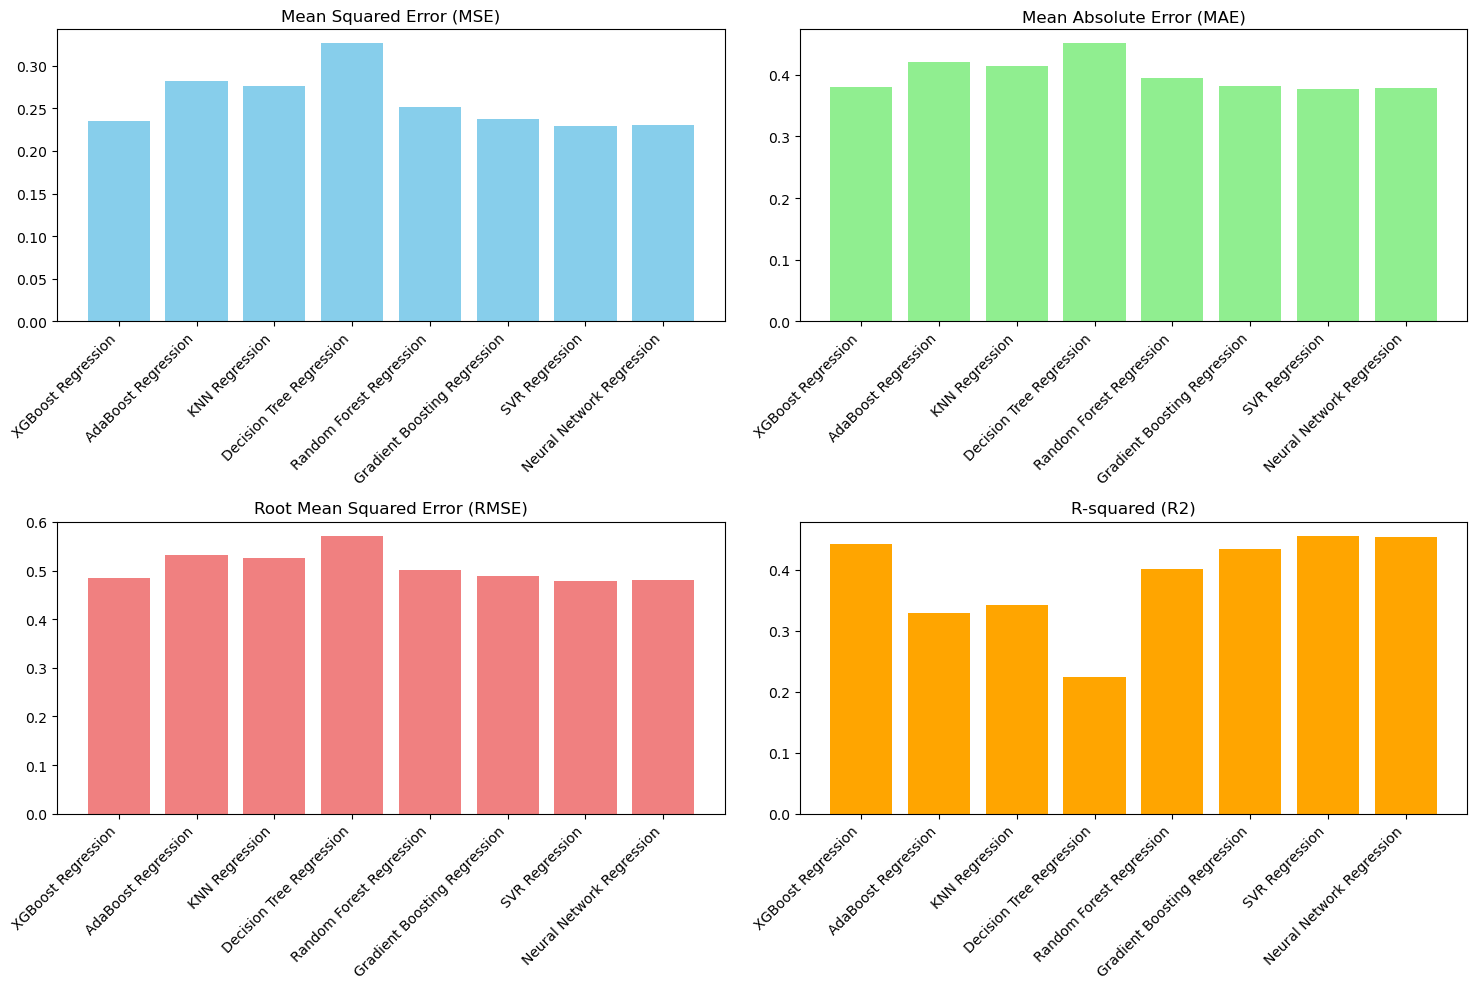

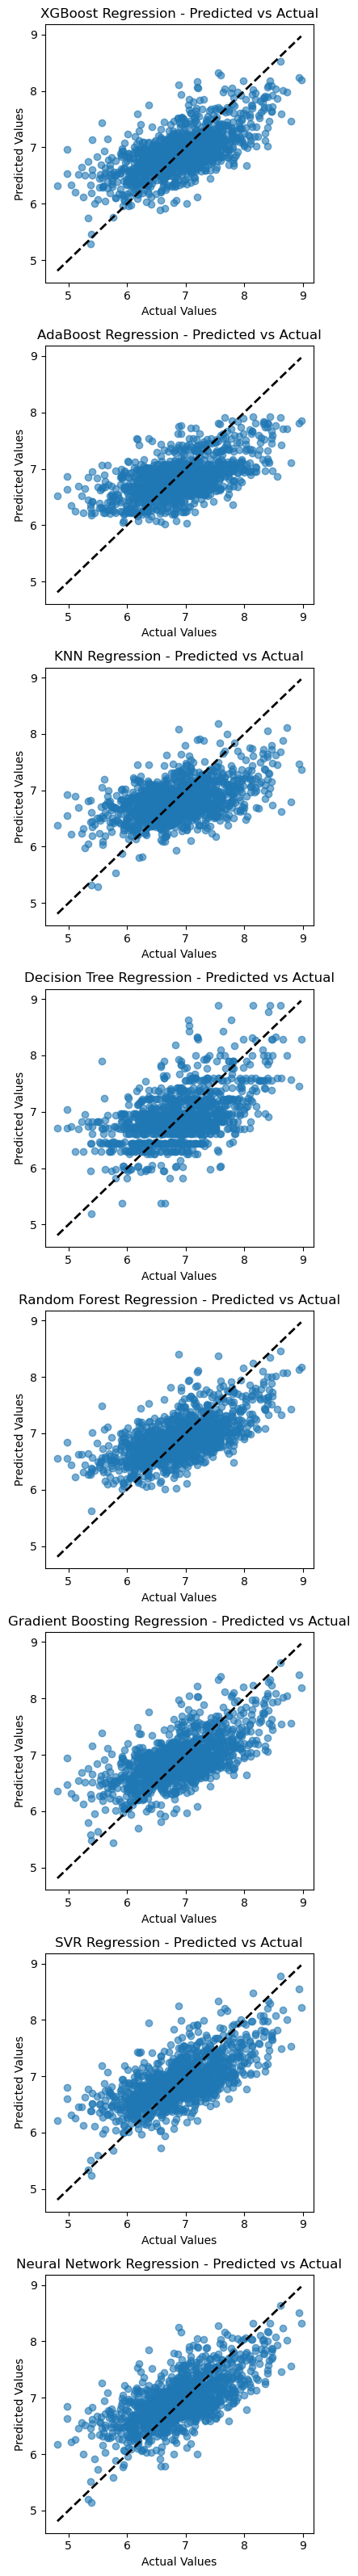

In [47]:
#using the MORE hyper-parameter tunning on the test set with 30 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:30]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features] 


# Define models with the best parameters found

best_params = {
    'XGBoost Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3,'colsample_bytree':0.7,'subsample':0.9},
    'AdaBoost Regression': {'n_estimators': 100, 'learning_rate': 0.2,'loss':'square'},
    'KNN Regression': {'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'ball_tree','leaf_size':10},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20,'min_samples_leaf':2},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 10,'bootstrap':True},
    'Gradient Boosting Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3,'subsample':0.9},
    'SVR Regression': {'C': 10, 'kernel': 'rbf', 'gamma': 'auto','epsilon':0.1},
    'Neural Network Regression': {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam','alpha':0.0001,'learning_rate':'constant'}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

                           Model       MSE       MAE      RMSE        R2  \
0             XGBoost Regression  0.234744  0.380259  0.484504  0.441743   
1            AdaBoost Regression  0.282335  0.421007  0.531352  0.328565   
2                 KNN Regression  0.276431  0.413601  0.525767  0.342605   
3       Decision Tree Regression  0.326608  0.451258  0.571496  0.223277   
4       Random Forest Regression  0.251898  0.395168  0.501895  0.400948   
5   Gradient Boosting Regression  0.238149  0.381361  0.488006  0.433644   
6                 SVR Regression  0.228993  0.376617  0.478532  0.455421   
7      Neural Network Regression  0.230147  0.377958  0.479737  0.452674   
8               Voting Regressor  0.229841  0.376728  0.479418  0.453402   
9        Stacking Regressor (LR)  0.227860  0.375142  0.477347  0.458114   
10       Stacking Regressor (RF)  0.251258  0.394882  0.501256  0.402471   
11       Stacking Regressor (GB)  0.230958  0.378371  0.480580  0.450748   

           

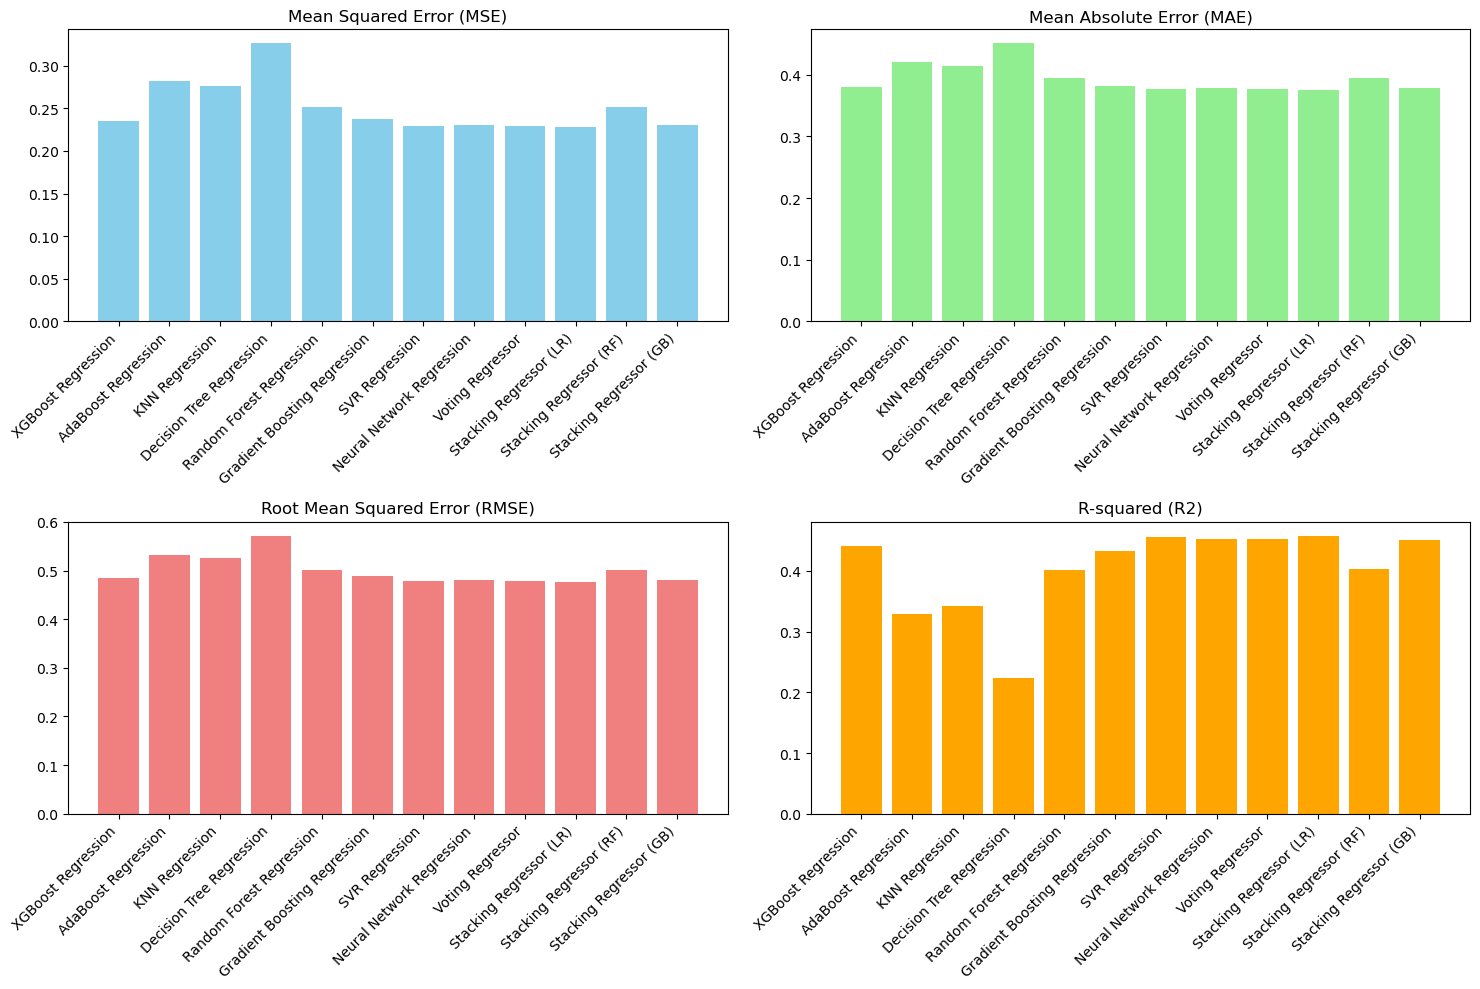

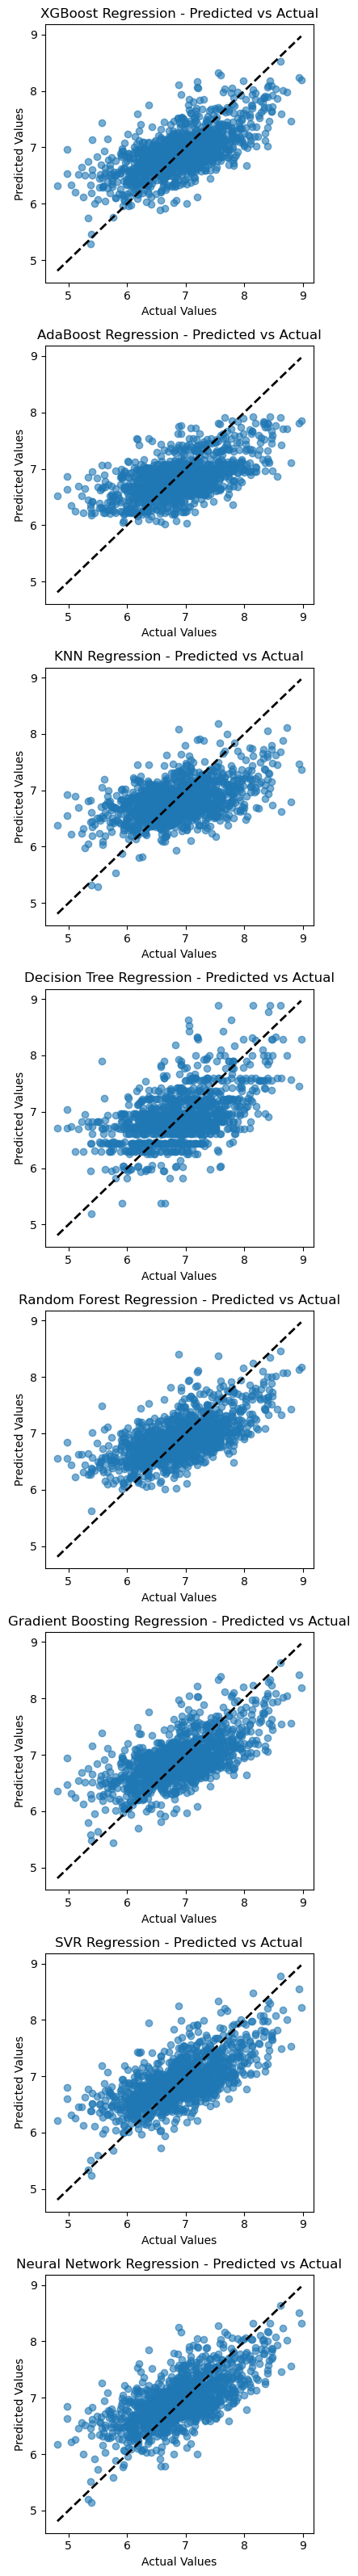

In [48]:
#tryin the more parameters with ensembles method on test data
#using the MORE hyper-parameter tunning on the test set with 20 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,VotingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:30]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features] 


# Define models with the best parameters found

#############paste the right one from the above

best_params = {
    'XGBoost Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3,'colsample_bytree':0.7,'subsample':0.9},
    'AdaBoost Regression': {'n_estimators': 100, 'learning_rate': 0.2,'loss':'square'},
    'KNN Regression': {'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'ball_tree','leaf_size':10},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20,'min_samples_leaf':2},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 10,'bootstrap':True},
    'Gradient Boosting Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3,'subsample':0.9},
    'SVR Regression': {'C': 10, 'kernel': 'rbf', 'gamma': 'auto','epsilon':0.1},
    'Neural Network Regression': {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam','alpha':0.0001,'learning_rate':'constant'}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Adding ensembling methods
voting_regressor = VotingRegressor(estimators=[
    ('xgb', models['XGBoost Regression']),
    ('rf', models['Random Forest Regression']),
    ('gb', models['Gradient Boosting Regression']),
    ('svr', models['SVR Regression']),
    ('nn', models['Neural Network Regression'])
])

stacking_regressor_lr = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=LinearRegression()
)

stacking_regressor_rf = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=random_state)
)

stacking_regressor_gb = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=random_state)
)

models.update({
    'Voting Regressor': voting_regressor,
    'Stacking Regressor (LR)': stacking_regressor_lr,
    'Stacking Regressor (RF)': stacking_regressor_rf,
    'Stacking Regressor (GB)': stacking_regressor_gb
})


# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

In [49]:
#using the best model here on the test set here

            Model       MSE       MAE      RMSE        R2         R
0  SVR Regression  0.228993  0.376617  0.478532  0.455421  0.676275


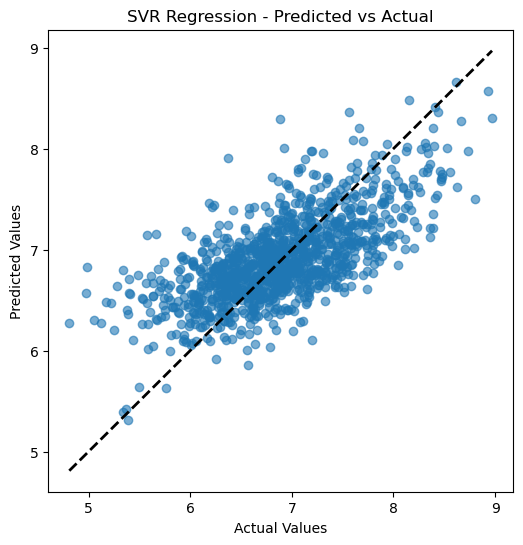

In [50]:
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 30 features
selected_features = feature_importances.index[:30]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features]

# Define SVR model with the best parameters found
svr_best_params = {'C': 10, 'kernel': 'rbf', 'gamma': 'auto'}
svr_model = SVR(**svr_best_params)

# Function to evaluate the SVR model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2, r

# Evaluate the SVR model
rmse, mae, mse, r2, r = evaluate_on_test(svr_model, X_train_val_subset, y_train_val, X_test_subset, y_test)

# Compile the results into a DataFrame
test_results_df = pd.DataFrame([{
    'Model': 'SVR Regression',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'R': r
}])

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2', 'R']])

# Visualization of predicted vs actual values
def plot_predictions(predictions, y_test):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, predictions, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title('SVR Regression - Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Plot the predictions
plot_predictions(svr_model.predict(X_test_subset), y_test)

In [56]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
X_train_val_subset.head()

fouls  shots_offtarget  crosses_acc  year   tackles  shotsblocked  \
4669   0.10              0.0     0.272727   0.0  0.133333           0.0   
5603   0.00              0.0     0.342246   0.0  0.200000           0.0   
856    0.15              0.0     0.336898   0.0  0.133333           0.0   
1335   0.10              0.0     0.176471   0.0  0.066667           0.0   
2259   0.15              0.0     0.240642   0.0  0.266667           0.0   

      aerials_l  game_duration  tballs_inacc  missed_penalties  countattack  \
4669   0.000000       0.000000      0.000000               0.0          0.0   
5603   0.384615       0.370370      0.444444               0.0          0.0   
856    0.230769       0.333333      0.111111               0.0          0.0   
1335   0.000000       0.130550      0.000000               0.0          0.0   
2259   0.153846       0.322581      0.222222               0.0          0.0   

      tballs_acc  offsides  dribbled_past   touches  stop_shots  owngoals  \
4669    0.363636       0.0       0.285714  0.000000    0.000000       0.0   
5603    0.272727       0.0       0.000000  0.000000    0.000000       0.0   
856     0.454545       0.0       0.000000  0.285714    0.166667       0.0   
1335    0.090909       0.0       0.000000  0.000000    0.166667       0.0   
2259    0.363636       0.0       0.285714  0.000000    0.000000       0.3   

      flow_success  closeness_centrality  passes_inacc  clearances  \
4669      0.593147                   0.0           0.0    0.242424   
5603      0.388122                   0.0           0.0    0.333333   
856       0.511361                   0.0           0.0    0.303030   
1335      0.235396                   0.0           0.0    0.303030   
2259      0.246303                   0.0           0.0    0.272727   

      chances2score  flow_centrality  pos_role_DR  lballs_inacc  drib_success  \
4669       0.000000         0.632979     0.433333           0.0           0.0   
5603       0.000000         0.760638     0.700000           0.0           0.2   
856        0.666667         0.864975     0.300000           0.0           0.4   
1335       0.000000         0.521277     0.000000           0.0           0.0   
2259       0.000000         0.558511     0.033333           0.0           0.0   

         month  grduels_l  poss_lost    ycards  
4669  0.727273   0.333333   0.133333  0.166667  
5603  0.727273   0.055556   0.066667  0.166667  
856   0.727273   0.111111   0.200000  0.000000  
1335  0.727273   0.055556   0.200000  0.333333  
2259  0.727273   0.611111   0.133333  0.000000

In [53]:
import joblib

# Assuming you have trained your SVR model
svr_model.fit(X_train_val_subset, y_train_val)

# Save the SVR model to a file
joblib_file = "svr_model.pkl"  
joblib.dump(svr_model, joblib_file)

print("Model saved successfully as 'svr_model.pkl'!")


Model saved successfully as 'svr_model.pkl'!


In [54]:
import joblib

# Load the saved SVR model
svr_model_loaded = joblib.load("svr_model.pkl")

In [55]:
# Display the parameters of the loaded model
print(svr_model_loaded.get_params())


{'C': 10, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
